In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\ProgramData\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
!pip install numpy==1.24.3


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
# Dataset paths
train_dir = r'D:/00.00 MINI_PROJECT/casting_data/casting_data/train'
val_dir = r'D:/00.00 MINI_PROJECT/casting_data/casting_data/test'


In [4]:
# Preprocessing & Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from folders
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:/00.00 MINI_PROJECT/casting_data/casting_data/train'

In [5]:
train_dir = r'D:/00.00 MINI_PROJECT/Data_Set/casting_data/casting_data/train'
val_dir = r'D:/00.00 MINI_PROJECT/Data_Set/casting_data/casting_data/test'


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from folders
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(224, 224, 3)),  # 👈 Recommended way in latest Keras
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [10]:
history = model.fit(
    train_data,
    epochs=10,               # you can increase this later (e.g., 20, 30)
    validation_data=val_data
)


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 115s 544ms/step - accuracy: 0.5871 - loss: 1.1044 - val_accuracy: 0.7944 - val_loss: 0.4456
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 116s 558ms/step - accuracy: 0.7603 - loss: 0.4752 - val_accuracy: 0.7217 - val_loss: 0.5383
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 115s 553ms/step - accuracy: 0.8636 - loss: 0.3117 - val_accuracy: 0.7636 - val_loss: 0.5167
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 114s 545ms/step - accuracy: 0.9017 - loss: 0.2297 - val_accuracy: 0.9175 - val_loss: 0.2044
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 118s 565ms/step - accuracy: 0.9322 - loss: 0.1677 - val_accuracy: 0.9762 - val_loss: 0.0754
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 113s 543ms/step - accuracy: 0.9367 - loss: 0.1673 - val_accuracy: 0.9469 - val_loss: 0.1374
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 121s 580ms/step - accuracy: 0.9090 - loss: 0.2258 - val_accuracy: 0.8196 - val_loss: 0.3903
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 115s 552ms/step - accuracy: 0.9281 -

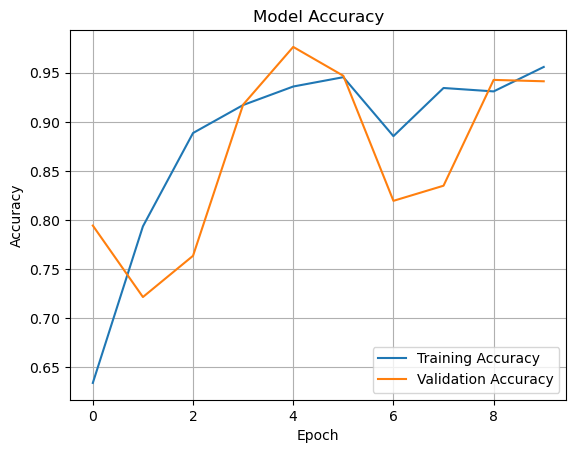

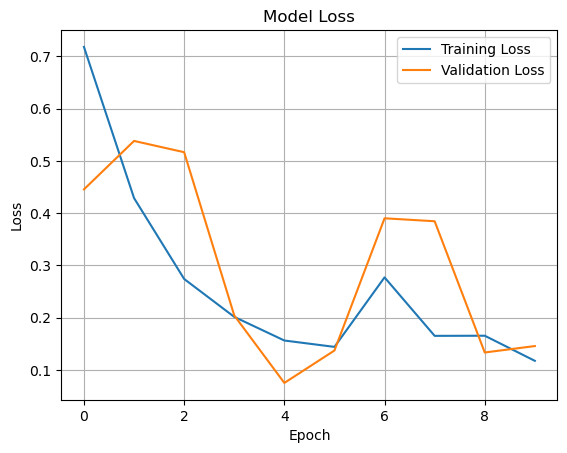

In [11]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('casting_defect_model.h5')

# ✅ Your full path including the image name
img_path = r'D:\00.00 MINI_PROJECT\casting_image.png'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalize to [0,1]

# Predict using the model
prediction = model.predict(img_array)

# Output result
if prediction[0][0] > 0.5:
    print("❌ Defect Detected")
else:
    print("✅ No Defect Detected")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'casting_defect_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [13]:
model.save('casting_defect_model.h5')


In [14]:
import os
print(os.getcwd())


C:\Users\Admin


In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# ✅ Your model path
model = load_model(r'C:/Users/Admin/casting_defect_model.h5')

# ✅ Your image path
img_path = r'"D:\00.00 MINI_PROJECT\Data_Set\casting_data\casting_data\test\def_front\cast_def_0_193.jpeg"'

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)

# Output result
if prediction[0][0] > 0.5:
    print("❌ Defect Detected")
else:
    print("✅ No Defect Detected")


OSError: [Errno 22] Invalid argument: '"D:\\00.00 MINI_PROJECT\\Data_Set\\casting_data\\casting_data\\test\\def_front\\cast_def_0_193.jpeg"'

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# ✅ Model path
model = load_model(r'C:/Users/Admin/casting_defect_model.h5')

# ✅ The image you mentioned (defective image)
img_path = r'D:/00.00 MINI_PROJECT/Data_Set/casting_data/casting_data/test/def_front/cast_def_0_193.jpeg'

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)

# Output result
if prediction[0][0] > 0.5:
    print("❌ Defect Detected")
else:
    print("✅ No Defect Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
✅ No Defect Detected


In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# ✅ Load the trained model
model = load_model(r'C:/Users/Admin/casting_defect_model.h5')

# ✅ The image path you provided (non-defective image)
img_path = r'D:/00.00 MINI_PROJECT/Data_Set/casting_data/casting_data/test/ok_front/cast_ok_0_16.jpeg'

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)

# Output result
if prediction[0][0] > 0.5:
    print("❌ Defect Detected")
else:
    print("✅ No Defect Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
❌ Defect Detected


In [19]:
print(train_data.class_indices)


{'def_front': 0, 'ok_front': 1}


In [20]:
if prediction[0][0] > 0.5:
    print("✅ No Defect Detected")  # Model is predicting "1" (ok_front)
else:
    print("❌ Defect Detected")  # Model is predicting "0" (def_front)


✅ No Defect Detected


In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# ✅ Load the trained model
model = load_model(r'C:/Users/Admin/casting_defect_model.h5')

# ✅ The defective image path you provided
img_path = r'D:/00.00 MINI_PROJECT/Data_Set/casting_data/casting_data/test/def_front/cast_def_0_1203.jpeg'

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)

# Output result (Fixed Logic)
if prediction[0][0] > 0.5:
    print("✅ No Defect Detected")
else:
    print("❌ Defect Detected")

# Optional: Show the probability
print(f"Probability Score: {prediction[0][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
❌ Defect Detected
Probability Score: 0.0000


In [22]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model(r'C:/Users/Admin/casting_defect_model.h5')

# Define base test directory
base_dir = r'D:/00.00 MINI_PROJECT/Data_Set/casting_data/casting_data/test'

# Define folders to loop through
folders = ['def_front', 'ok_front']

# Loop through both folders
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    
    print(f"\n🔍 Checking folder: {folder.upper()}\n")
    
    for img_file in os.listdir(folder_path):
        if img_file.endswith(('.jpeg', '.jpg', '.png')):  # filter image files
            img_path = os.path.join(folder_path, img_file)

            # Load and preprocess each image
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            # Predict
            prediction = model.predict(img_array)

            # Display result
            if prediction[0][0] > 0.5:
                label = "✅ No Defect Detected"
            else:
                label = "❌ Defect Detected"
            
            print(f"Image: {img_file} --> {label} (Score: {prediction[0][0]:.4f})")



🔍 Checking folder: DEF_FRONT



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Image: cast_def_0_1059.jpeg --> ❌ Defect Detected (Score: 0.1989)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: cast_def_0_1063.jpeg --> ❌ Defect Detected (Score: 0.4310)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image: cast_def_0_108.jpeg --> ❌ Defect Detected (Score: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: cast_def_0_1096.jpeg --> ❌ Defect Detected (Score: 0.2445)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: cast_def_0_112.jpeg --> ❌ Defect Detected (Score: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image: cast_def_0_1134.jpeg --> ❌ Defect Detected (Score: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image: cast_def_0_1136.jpeg --> ❌ Defect Detected (Score: 0.0062)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: cast_def_0_1137.jpeg --> ✅ No Defect Detected (Score: 0.6137)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: cast_def_0_1153.jpeg --> ❌ Defect Detected (Score: 0.0365)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: cast_def_0_1171.j

In [23]:
import os
import csv
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model(r'C:/Users/Admin/casting_defect_model.h5')

# Define base test directory
base_dir = r'D:/00.00 MINI_PROJECT/Data_Set/casting_data/casting_data/test'
folders = ['def_front', 'ok_front']

# Prepare CSV file
csv_filename = 'batch_prediction_report.csv'
csv_data = [['Image Name', 'Folder', 'Prediction', 'Probability Score']]

# Loop through folders and images
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    
    for img_file in os.listdir(folder_path):
        if img_file.endswith(('.jpeg', '.jpg', '.png')):
            img_path = os.path.join(folder_path, img_file)

            # Load and preprocess
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            # Predict
            prediction = model.predict(img_array)
            prob_score = prediction[0][0]

            if prob_score > 0.5:
                label = "No Defect Detected"
            else:
                label = "Defect Detected"
            
            # Save result to CSV data
            csv_data.append([img_file, folder, label, f"{prob_score:.4f}"])

# Write to CSV
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)

print(f"✅ Report saved as: {csv_filename}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━

In [24]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/3d/b0/031933cb253d757dfc8791707d413ce90ab52ec7fb4524ef955070136d31/streamlit-1.43.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/aa/f3/0b6ced594e51cc95d8c1fc1640d3623770d01e4969d29c0bd09945fafefa/altair-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/10/cb/f2ad4230dc2eb1a74edf38f1a38b9b52277f75bef262d8908e60d957e13c/blinker-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/72/76/20fa66124dbe6be5cafeb312ece67de6b61dd91a0247d1ea13db4ebb33c2/cachetools-5.5.2-py3-none-any.whl.metadata
  Obtaining dependenc

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.


In [25]:
app.py


NameError: name 'app' is not defined